## imports

In [333]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import random
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# a)

## preprocessing

### load and EDA

In [334]:
df_train = pd.read_csv("HW2 - Data/H1.csv")       
df_test = pd.read_csv("HW2 - Data/H2.csv")

In [335]:
df_train.shape, df_test.shape

((40060, 28), (79330, 28))

In [336]:
df_train.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,342,2015,July,27,1,0,0,2,0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,0,737,2015,July,27,1,0,0,2,0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,0,7,2015,July,27,1,0,1,1,0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,0,13,2015,July,27,1,0,1,1,0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,0,14,2015,July,27,1,0,2,2,0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [337]:
df_train.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.527758,94.952930,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,7.428580,61.442418,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.00000


In [338]:
df_train.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
DaysInWaitingList                int64
CustomerType                    object
ADR                            float64
RequiredCarParkingSpaces 

### missing values

In [339]:
def missing_values_preprocessing(df):
    """
    find missing values and remove data with missing value
    """
    
    # check for missing values
    columns_with_null = df.columns[df.isnull().sum() != 0]
    print("[BEFORE] columns with null value:")
    print(columns_with_null)
    
    # remove missing datas
    indices = []
    for col in columns_with_null:
        indices += list(df.loc[pd.isna(df[col]), :].index)
    indices = list(set(indices))
    df = df.drop(df.index[indices])   

    # show that there is no missing value
    columns_with_null = df.columns[df.isnull().sum() != 0]
    print("[AFTER] columns with null value:")
    print(columns_with_null)
    return df

In [340]:
df_train = missing_values_preprocessing(df_train)
print('-' * 50)
df_test = missing_values_preprocessing(df_test)

[BEFORE] columns with null value:
Index(['Country'], dtype='object')
[AFTER] columns with null value:
Index([], dtype='object')
--------------------------------------------------
[BEFORE] columns with null value:
Index(['Children', 'Country'], dtype='object')
[AFTER] columns with null value:
Index([], dtype='object')


### categorical variables

In [341]:
# find categorical variable and their values
categorical_df = df_train.select_dtypes(include=['object'])
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df = df_train.select_dtypes(include=numerics)
for col in categorical_df.columns:
    print(col)
    print(df_train[col].value_counts())
    print('-'*30)

ArrivalDateMonth
August       4873
July         4540
April        3569
May          3547
October      3504
March        3281
September    3067
February     3047
June         3033
December     2599
November     2398
January      2138
Name: ArrivalDateMonth, dtype: int64
------------------------------
Meal
BB           29578
HB            8017
Undefined     1165
FB             754
SC              82
Name: Meal, dtype: int64
------------------------------
Country
PRT    17630
GBR     6814
ESP     3957
IRL     2166
FRA     1611
       ...  
BIH        1
MUS        1
COM        1
UGA        1
DJI        1
Name: Country, Length: 125, dtype: int64
------------------------------
MarketSegment
Online TA        17655
Offline TA/TO     7427
Direct            6357
Groups            5832
Corporate         2126
Complementary      199
Name: MarketSegment, dtype: int64
------------------------------
DistributionChannel
TA/TO        28800
Direct        7705
Corporate     3090
Undefined        1
Name: D

In [342]:
def categorical_to_numerical_preprocessing(df_train, df_test):
    """
    change categorial variable to numerical
    """
    all_mappings = {}
    def categorical_to_numerical(df_train, df_test, feature):
        """
        assign uniqe number for each possible value of a feature
        """
        
        # dict for mapping categorical value to numerical
        map_dict = {}
        
        # find all possible value and map a uniqe number to them
        for i, item in enumerate(set(df_test[feature].values) | set(df_train[feature].values)):
            map_dict[item] = i
        
        all_mappings[feature] = map_dict
        # change categorical to numerical regarding to mapping we found previously
        df_test[feature] = df_test[feature].map(map_dict)
        df_train[feature] = df_train[feature].map(map_dict)
        
        return df_train, df_test

    # change categorial variable to numerical for all categorical features
    for col in categorical_df.columns:
        if (col == "ReservedRoomType"):
            continue
        df_train, df_test = categorical_to_numerical(df_train, df_test, col)
    
    pprint(all_mappings)
    # year is numerical but its values are few and large so we map them to 0, ..., 3
    if 'ArrivalDateYear' in df_train.columns:
        df_train['ArrivalDateYear'] = df_train['ArrivalDateYear'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})
        df_test['ArrivalDateYear'] = df_test['ArrivalDateYear'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})
    
    if 'ReservedRoomType' in df_train.columns:
        df_train['ReservedRoomType'] = df_train['ReservedRoomType'].map(all_mappings['AssignedRoomType'])
        df_test['ReservedRoomType'] = df_test['ReservedRoomType'].map(all_mappings['AssignedRoomType'])
        
    return df_train, df_test

In [343]:
df_train, df_test = categorical_to_numerical_preprocessing(df_train, df_test)

{'ArrivalDateMonth': {'April': 6,
                      'August': 0,
                      'December': 11,
                      'February': 4,
                      'January': 8,
                      'July': 5,
                      'June': 7,
                      'March': 2,
                      'May': 3,
                      'November': 9,
                      'October': 1,
                      'September': 10},
 'AssignedRoomType': {'A               ': 11,
                      'B               ': 4,
                      'C               ': 5,
                      'D               ': 3,
                      'E               ': 1,
                      'F               ': 7,
                      'G               ': 10,
                      'H               ': 2,
                      'I               ': 6,
                      'K               ': 8,
                      'L               ': 9,
                      'P               ': 0},
 'Country': {'ABW': 78,
        

In [344]:
df_test.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,6,0,5,27,1,0,2,1,0.0,...,11,11,0,1,0,0,0.0,0,0,1
1,1,88,0,5,27,1,0,4,2,0.0,...,11,11,0,1,0,0,76.5,0,1,0
2,1,65,0,5,27,1,0,4,1,0.0,...,11,11,0,1,0,0,68.0,0,1,0
3,1,92,0,5,27,1,2,4,2,0.0,...,11,11,0,1,0,0,76.5,0,2,0
4,1,100,0,5,27,2,0,2,2,0.0,...,11,11,0,1,0,0,76.5,0,1,0


### Normalization

In [345]:
# before normalizing
df_train.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
count,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,...,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000
mean,0.279750,93.438857,1.916860,4.954667,27.152515,15.827028,1.196383,3.141529,1.872942,0.129862,...,7.827483,6.749848,0.288767,1.039827,0.533943,0.533034,95.347555,0.137009,0.621048,0.734746
std,0.448882,97.387321,1.073276,3.438422,13.967053,8.881599,1.142050,2.445976,0.697112,0.447192,...,4.116128,4.131129,0.728443,0.213107,7.471759,0.953679,61.495116,0.349976,0.813648,0.457598
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50.500000,0.000000,0.000000,0.000000
50%,0.000000,59.000000,2.000000,5.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,...,11.000000,7.000000,0.000000,1.000000,0.000000,0.000000,76.000000,0.000000,0.000000,1.000000
75%,1.000000,155.000000,3.000000,8.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,...,11.000000,11.000000,0.000000,1.000000,0.000000,0.000000,125.617500,0.000000,1.000000,1.000000
max,1.000000,737.000000,3.000000,11.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,...,11.000000,11.000000,17.000000,2.000000,185.000000,3.000000,508.000000,8.000000,5.000000,2.000000


### remove outliners

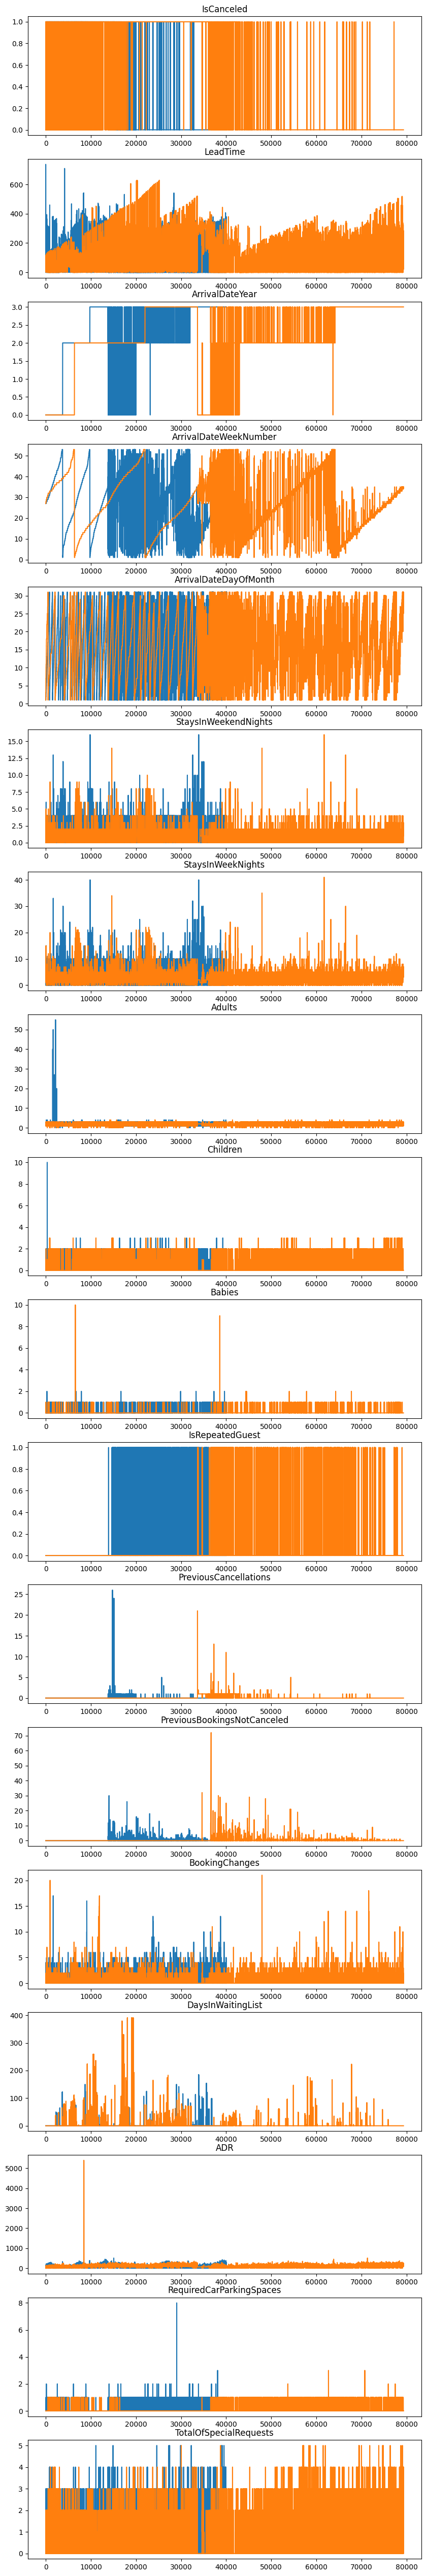

In [346]:
# plot numerical variables to find outliners

fig, axes = plt.subplots(nrows=len(numerical_df.columns), ncols=1, figsize=(10, 65))
for i, col in enumerate(numerical_df.columns):
    df_train[col].plot(ax=axes[i])
    axes[i].set_title(f'{col}')
    df_test[col].plot(ax=axes[i])


In [347]:
# figure list of outliners from above plots
outliners = [
            # 'RequiredCarParkingSpaces',
            'ADR',
            # 'PreviousBookingsNotCanceled',
            # 'Children',
            # 'Babies',
            # 'Adults',
            ]

In [348]:
df_all = pd.concat([df_train, df_test])
df_all.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,...,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,1.973809,4.964718,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,...,8.890427,8.187253,0.221181,1.121205,2.330754,0.529479,102.003243,0.061885,0.571683,0.648884
std,0.483168,106.903309,1.037407,3.414238,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,...,3.590768,3.853518,0.652785,0.330515,17.630452,0.936305,50.485862,0.244172,0.792678,0.498068
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2.000000,5.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,11.000000,11.000000,0.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,1.000000
75%,1.000000,161.000000,3.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,11.000000,11.000000,0.000000,1.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,1.000000,737.000000,3.000000,11.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,...,11.000000,11.000000,21.000000,2.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000


In [349]:
def remove_outliners_preprocessing(df_all, df_train, df_test, outliners):
    """
    remove outliners according to IQR
    """
    
    for outline in outliners:
        q75,q25 = np.percentile(df_all.loc[:,outline],[75,25])
        print(q75, q25)
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        print(min, max)
        df_train.loc[df_train[outline] < min,outline] = np.nan
        df_train.loc[df_train[outline] > max,outline] = np.nan
        df_train = df_train.dropna(axis = 0)

        df_test.loc[df_test[outline] < min,outline] = np.nan
        df_test.loc[df_test[outline] > max,outline] = np.nan
        df_test = df_test.dropna(axis = 0)

        df_all.loc[df_all[outline] < min,outline] = np.nan
        df_all.loc[df_all[outline] > max,outline] = np.nan
        df_all = df_all.dropna(axis = 0)
    return df_all, df_train, df_test


In [350]:
df_all, df_train, df_test = remove_outliners_preprocessing(df_all, df_train, df_test, outliners)

126.0 70.0
-14.0 210.0


In [351]:
df_train.shape, df_test.shape

((37029, 28), (77986, 28))

In [352]:
df_train.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
dtype: int64

In [354]:
def normalize_data_preprocessing(df):
    """
    normalize input features using min-max normalizer
    """
#     df['LeadTime'] = np.log(df['LeadTime'] + 1)
#     df['ArrivalDateWeekNumber'] = np.log(df['ArrivalDateWeekNumber'] + 1)
#     df['ArrivalDateDayOfMonth'] = np.log(df['ArrivalDateDayOfMonth'] + 1)
#     df['Country'] = np.log(df['Country'] + 1)
    
    # copy the data
    df_min_max_scaled = df.copy()

    # apply min-max normalization techniques
    for column in df_min_max_scaled.columns:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_all[column].min()) / (df_all[column].max() - df_all[column].min())  
    
    return df_min_max_scaled

In [355]:
df_train = normalize_data_preprocessing(df_train)
df_test = normalize_data_preprocessing(df_test)

In [356]:
# after normalizing
df_train.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
count,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,...,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000
mean,0.272003,0.127977,0.628786,0.468429,0.495848,0.492541,0.074298,0.076064,0.033732,0.009841,...,0.723487,0.619070,0.013458,0.521294,0.001440,0.185926,0.421034,0.016663,0.119906,0.371533
std,0.444997,0.133985,0.359543,0.306808,0.275368,0.296443,0.071936,0.060457,0.012893,0.039019,...,0.372381,0.376579,0.034336,0.109929,0.019632,0.323305,0.217693,0.043295,0.159481,0.226933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.013569,0.666667,0.181818,0.269231,0.233333,0.000000,0.024390,0.036364,0.000000,...,0.272727,0.272727,0.000000,0.500000,0.000000,0.000000,0.255939,0.000000,0.000000,0.000000
50%,0.000000,0.080054,0.666667,0.454545,0.500000,0.500000,0.062500,0.073171,0.036364,0.000000,...,1.000000,0.636364,0.000000,0.500000,0.000000,0.000000,0.362233,0.000000,0.000000,0.500000
75%,1.000000,0.214383,1.000000,0.727273,0.730769,0.766667,0.125000,0.121951,0.036364,0.000000,...,1.000000,1.000000,0.000000,0.500000,0.000000,0.666667,0.546076,0.000000,0.200000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975610,1.000000,1.000000,...,1.000000,1.000000,0.809524,1.000000,0.473146,1.000000,1.000000,1.000000,1.000000,1.000000


In [357]:
df_train.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0.0,0.464043,0.0,0.454545,0.5,0.0,0.0,0.00000,0.036364,0.0,...,0.454545,0.454545,0.142857,0.5,0.0,0.0,0.029485,0.0,0.0,0.5
1,0.0,1.000000,0.0,0.454545,0.5,0.0,0.0,0.00000,0.036364,0.0,...,0.454545,0.454545,0.190476,0.5,0.0,0.0,0.029485,0.0,0.0,0.5
2,0.0,0.009498,0.0,0.454545,0.5,0.0,0.0,0.02439,0.018182,0.0,...,1.000000,0.454545,0.000000,0.5,0.0,0.0,0.376098,0.0,0.0,0.5
3,0.0,0.017639,0.0,0.454545,0.5,0.0,0.0,0.02439,0.018182,0.0,...,1.000000,1.000000,0.000000,0.5,0.0,0.0,0.376098,0.0,0.0,0.5
4,0.0,0.018996,0.0,0.454545,0.5,0.0,0.0,0.04878,0.036364,0.0,...,1.000000,1.000000,0.000000,0.5,0.0,0.0,0.482392,0.0,0.2,0.5


## Validation and train split

In [358]:
def train_validation_split(df, validation_size):
    """ 
    Splits the dataset(df) to train and test with the number/pertentage of test dataset. 
    """
    
    if isinstance(validation_size, float):                              
        validation_size = round(validation_size * len(df))

    indices = df.index.tolist()                                        
    validation_indices = random.sample(population=indices, k=validation_size)      

    validation_df = df.loc[validation_indices]                                     
    train_df = df.drop(validation_indices)                                   
    
    return train_df, validation_df

In [359]:
random.seed(0)     
train_df, validation_df = train_validation_split(df_train, validation_size=0.2)

In [360]:
# seprate x and y
x_train = train_df.drop('ADR', axis=1)
y_train = train_df.loc[:,'ADR']
x_validation = validation_df.drop('ADR', axis=1)
y_validation = validation_df.loc[:,'ADR']
x_test = df_test.drop('ADR', axis=1)
y_test = df_test.loc[:,'ADR']

In [361]:
x_train

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0.0,0.464043,0.0,0.454545,0.500000,0.000000,0.000,0.000000,0.036364,0.0,...,0.0,0.454545,0.454545,0.142857,0.5,0.0,0.000000,0.0,0.0,0.5
1,0.0,1.000000,0.0,0.454545,0.500000,0.000000,0.000,0.000000,0.036364,0.0,...,0.0,0.454545,0.454545,0.190476,0.5,0.0,0.000000,0.0,0.0,0.5
2,0.0,0.009498,0.0,0.454545,0.500000,0.000000,0.000,0.024390,0.018182,0.0,...,0.0,1.000000,0.454545,0.000000,0.5,0.0,0.000000,0.0,0.0,0.5
3,0.0,0.017639,0.0,0.454545,0.500000,0.000000,0.000,0.024390,0.018182,0.0,...,0.0,1.000000,1.000000,0.000000,0.5,0.0,0.000000,0.0,0.0,0.5
5,0.0,0.018996,0.0,0.454545,0.500000,0.000000,0.000,0.048780,0.036364,0.0,...,0.0,1.000000,1.000000,0.000000,0.5,0.0,0.000000,0.0,0.2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,0.0,0.229308,1.0,0.000000,0.653846,0.966667,0.125,0.219512,0.036364,0.0,...,0.0,0.090909,0.090909,0.000000,0.5,0.0,0.666667,0.0,0.2,0.5
40056,0.0,0.229308,1.0,0.000000,0.653846,0.966667,0.125,0.219512,0.036364,0.0,...,0.0,0.090909,0.090909,0.000000,0.5,0.0,0.666667,0.0,0.2,0.5
40057,0.0,0.276798,1.0,0.000000,0.653846,0.933333,0.250,0.243902,0.036364,0.0,...,0.0,0.090909,0.090909,0.000000,0.5,0.0,0.000000,0.0,0.6,0.5
40058,0.0,0.286296,1.0,0.000000,0.653846,1.000000,0.250,0.243902,0.036364,0.0,...,0.0,0.272727,0.272727,0.000000,0.5,0.0,1.000000,0.0,0.2,0.5


In [362]:
y_train

0        0.029485
1        0.029485
2        0.376098
3        0.376098
5        0.482392
           ...   
40054    0.973519
40056    0.964276
40057    0.739209
40058    0.550790
40059    0.487291
Name: ADR, Length: 29623, dtype: float64

In [363]:
def train(epoch, loss):
    """ train ANN """
    model  = Sequential()
    model.add(Dense(100, activation = 'relu', input_shape = (x_train.shape[1], )))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = loss, metrics = ["mae", "mse"])
    model_history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs = epoch)
    return model_history, model

def draw_plot(plt, loss, epoch, model_history):
    """ draw loss plots """
    train_loss = model_history.history[loss]
    val_loss = model_history.history['val_' + loss] 
    
    # Generate a sequence of integers to represent the epoch numbers
    epochs = range(1, epoch+1)

    # Plot and label the training and validation loss values
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')

    # Add in a title and axes labels
    plt.set_title(f"epoch: {epoch}, loss: {loss}")
    plt.set_xlabel('Epochs')
    plt.set_ylabel('Loss')

    # Set the tick locations
    plt.set_xticks(np.arange(0, epoch+1, epoch/5))

    # Display the plot
    plt.legend(loc='best')


----

# b)

Epoch 1/30
926/926 [==============================] - 6s 5ms/step - loss: 0.1191 - mae: 0.1191 - mse: 0.0269 - val_loss: 0.1028 - val_mae: 0.1028 - val_mse: 0.0213
Epoch 2/30
926/926 [==============================] - 3s 4ms/step - loss: 0.0866 - mae: 0.0866 - mse: 0.0157 - val_loss: 0.0804 - val_mae: 0.0804 - val_mse: 0.0138
Epoch 3/30
926/926 [==============================] - 4s 4ms/step - loss: 0.0780 - mae: 0.0780 - mse: 0.0134 - val_loss: 0.0750 - val_mae: 0.0750 - val_mse: 0.0123
Epoch 4/30
926/926 [==============================] - 4s 4ms/step - loss: 0.0735 - mae: 0.0735 - mse: 0.0125 - val_loss: 0.0718 - val_mae: 0.0718 - val_mse: 0.0114
Epoch 5/30
926/926 [==============================] - 3s 3ms/step - loss: 0.0703 - mae: 0.0703 - mse: 0.0118 - val_loss: 0.0742 - val_mae: 0.0742 - val_mse: 0.0122
Epoch 6/30
926/926 [==============================] - 4s 4ms/step - loss: 0.0681 - mae: 0.0681 - mse: 0.0115 - val_loss: 0.0678 - val_mae: 0.0678 - val_mse: 0.0106
Epoch 7/30
926/9

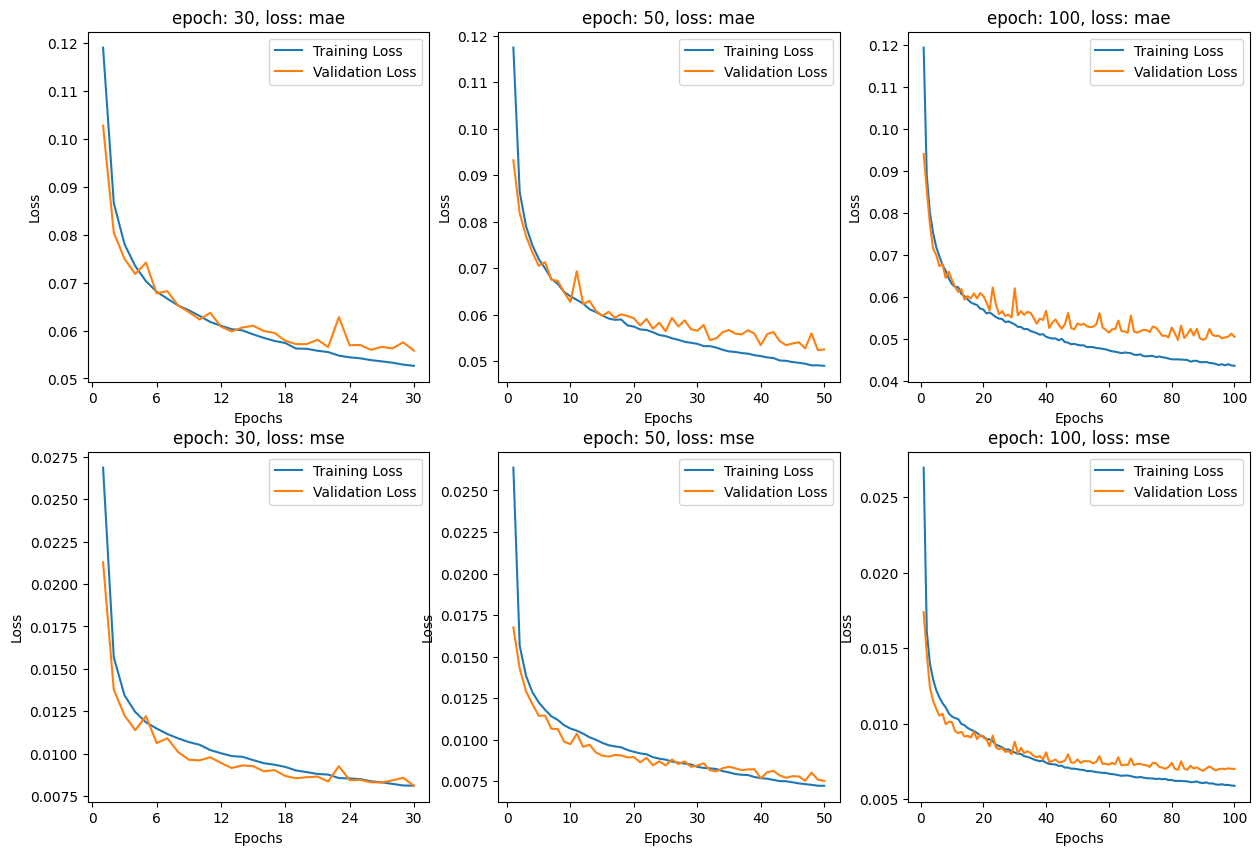

In [365]:
epochs=[30, 50, 100]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
models = [None, None, None]
for j, epoch in enumerate(epochs):
    history, models[j] = train(epoch=epoch, loss='mean_absolute_error')
    draw_plot(axs[0, j], 'mae', epoch, history)
    draw_plot(axs[1, j], 'mse', epoch, history)    

In [366]:
x_test

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0.0,0.008141,0.0,0.454545,0.500000,0.000000,0.000,0.048780,0.018182,0.0,...,0.0,1.000000,1.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.5
1,1.0,0.119403,0.0,0.454545,0.500000,0.000000,0.000,0.097561,0.036364,0.0,...,0.0,1.000000,1.000000,0.0,0.5,0.0,0.0,0.0,0.2,0.0
2,1.0,0.088195,0.0,0.454545,0.500000,0.000000,0.000,0.097561,0.018182,0.0,...,0.0,1.000000,1.000000,0.0,0.5,0.0,0.0,0.0,0.2,0.0
3,1.0,0.124830,0.0,0.454545,0.500000,0.000000,0.125,0.097561,0.036364,0.0,...,0.0,1.000000,1.000000,0.0,0.5,0.0,0.0,0.0,0.4,0.0
4,1.0,0.135685,0.0,0.454545,0.500000,0.033333,0.000,0.048780,0.036364,0.0,...,0.0,1.000000,1.000000,0.0,0.5,0.0,0.0,0.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79324,0.0,0.028494,1.0,0.000000,0.653846,0.966667,0.125,0.121951,0.036364,0.0,...,0.0,1.000000,1.000000,0.0,0.5,0.0,0.0,0.0,0.4,0.5
79325,0.0,0.031208,1.0,0.000000,0.653846,0.966667,0.125,0.121951,0.036364,0.0,...,0.0,1.000000,1.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.5
79327,0.0,0.046133,1.0,0.000000,0.653846,1.000000,0.125,0.121951,0.036364,0.0,...,0.0,0.272727,0.272727,0.0,0.5,0.0,0.0,0.0,0.8,0.5
79328,0.0,0.147897,1.0,0.000000,0.653846,1.000000,0.125,0.121951,0.036364,0.0,...,0.0,1.000000,1.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.5


In [368]:
acc_ann = models[0].evaluate(x_test, y_test)
acc_ann

2438/2438 [==============================] - 3s 1ms/step - loss: 0.1810 - mae: 0.1810 - mse: 0.0454


[0.18097196519374847, 0.18097196519374847, 0.04537076875567436]

---

# C)

In [370]:
predicts = models[0].predict(x_test)
final = np.zeros((predicts.shape[0], 3))
max = df_all['ADR'].max()
min = df_all['ADR'].min()

final[:, 0] = predicts[0,:] * (max - min) + min
final[:, 1] = y_test * (max - min) + min
final[:, 2] = abs(final[:, 1] - final[:, 0])
final_df = pd.DataFrame(final, columns=["predicted", "real", "diff"])
# final_df = final_df.sort_values(by='diff')
final_df.to_csv('Result.csv', sep=',')

2438/2438 [==============================] - 3s 1ms/step


-----------------

# D)

Heatmap is a graphical representation of 2D (two-dimensional) data. Each data value represents in a matrix.

Firstly, plot the pair plot between all independent features and dependent features. It will give the relation between dependent and independent features. 
Then we will sort features regarding to its relation with 'ADR' and we remove 12 least related features

-------

# E)

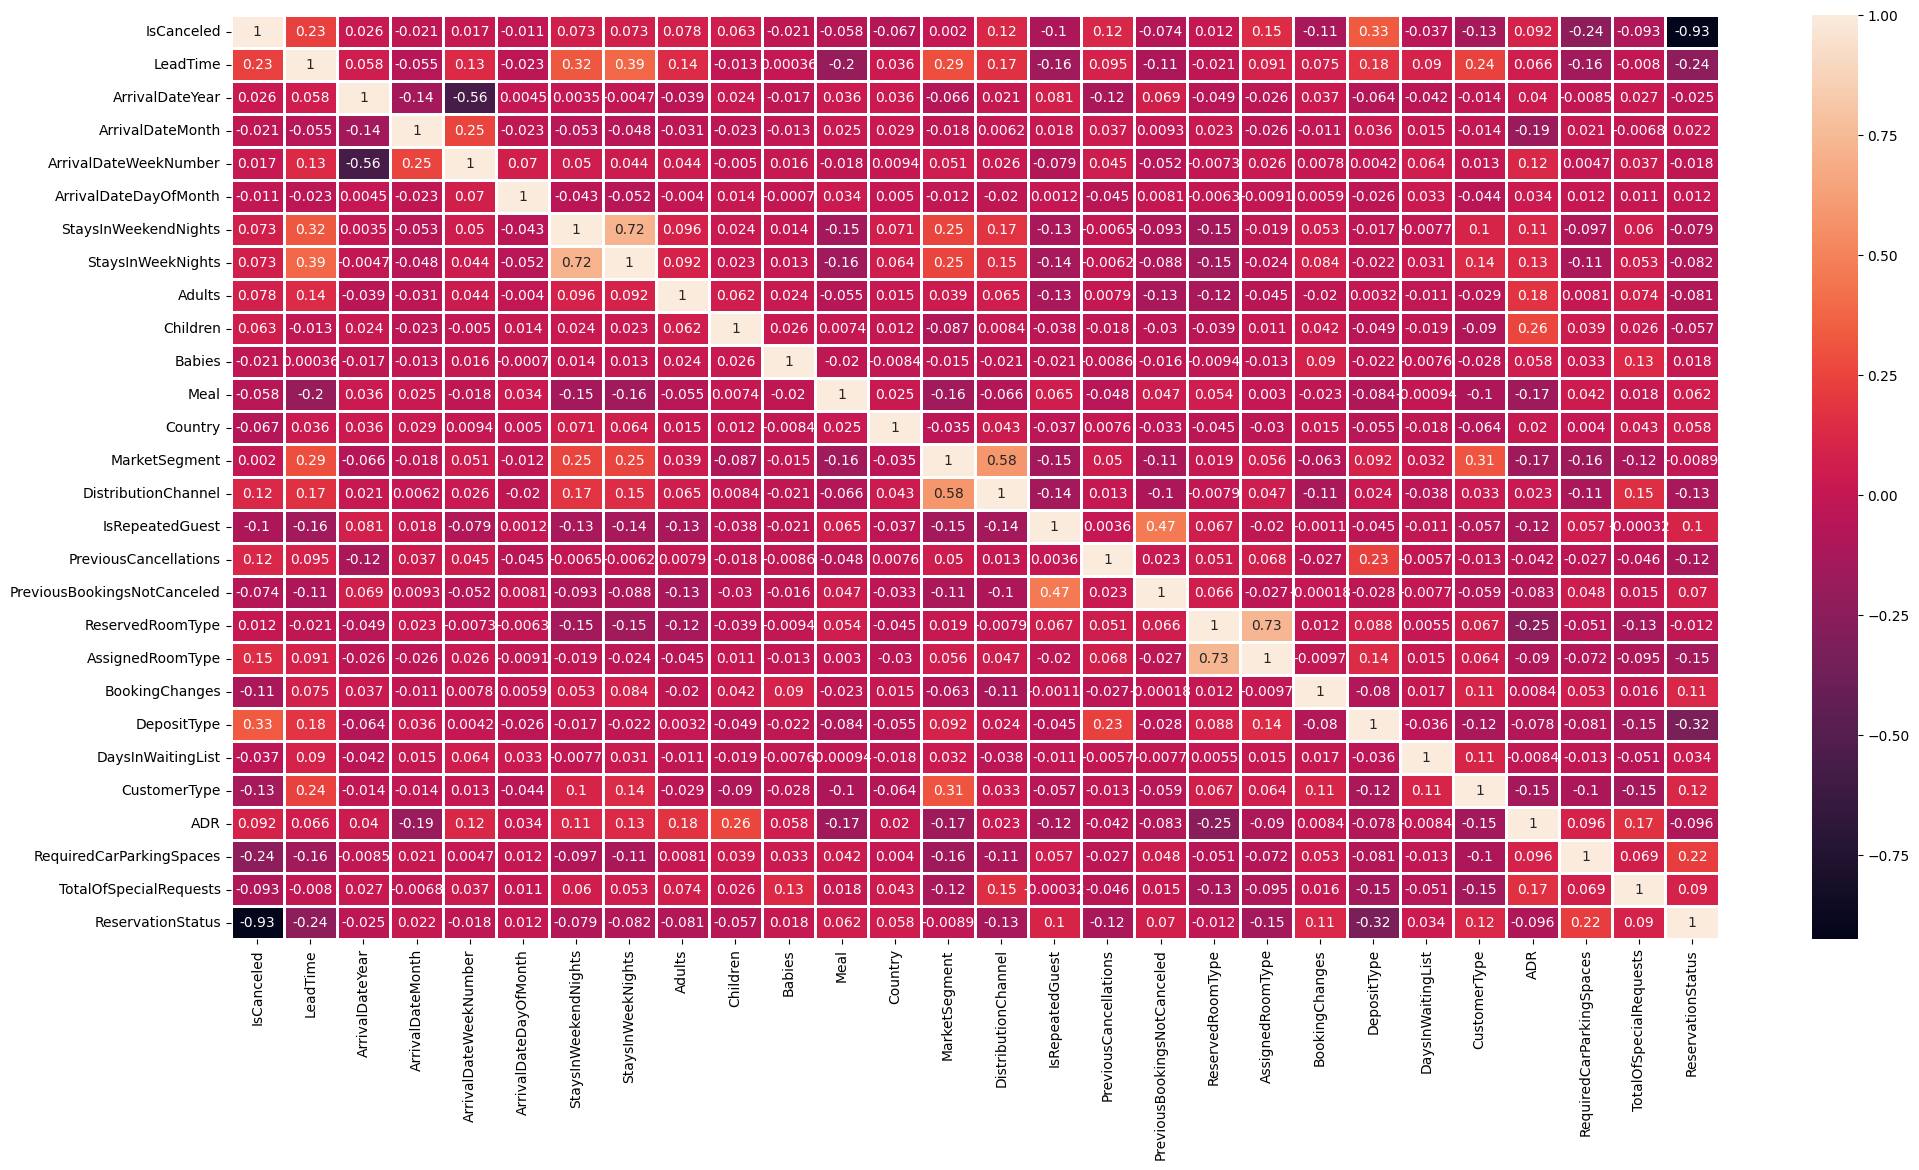

In [373]:
plt.figure(figsize = (24, 12))

corr = df_train.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [374]:
correlation = df_train.corr()['ADR'].abs().sort_values(ascending = False)
correlation

ADR                            1.000000
Children                       0.257808
ReservedRoomType               0.251966
ArrivalDateMonth               0.187449
Adults                         0.177960
MarketSegment                  0.170106
TotalOfSpecialRequests         0.167585
Meal                           0.165845
CustomerType                   0.147974
StaysInWeekNights              0.130558
ArrivalDateWeekNumber          0.121471
IsRepeatedGuest                0.119403
StaysInWeekendNights           0.114342
ReservationStatus              0.096443
RequiredCarParkingSpaces       0.095953
IsCanceled                     0.091578
AssignedRoomType               0.090279
PreviousBookingsNotCanceled    0.082708
DepositType                    0.078053
LeadTime                       0.066143
Babies                         0.057515
PreviousCancellations          0.042062
ArrivalDateYear                0.039930
ArrivalDateDayOfMonth          0.034296
DistributionChannel            0.023155


In [382]:
df_train = pd.read_csv("HW2 - Data/H1.csv")       
df_test = pd.read_csv("HW2 - Data/H2.csv")

In [384]:
# dropping columns that are not useful

useless_col = ['Meal',
                'PreviousBookingsNotCanceled',
                'MarketSegment',
                'ArrivalDateYear',
                'DepositType',
                'PreviousCancellations',
                'Babies',
                'DaysInWaitingList',
                'ArrivalDateDayOfMonth',
                'BookingChanges',
                'ArrivalDateMonth',
                'Country'
              ]


In [385]:
# preprocessing
df_train = missing_values_preprocessing(df_train)
df_test = missing_values_preprocessing(df_test)

df_train, df_test = categorical_to_numerical_preprocessing(df_train, df_test)

df_train = normalize_data_preprocessing(df_train)
df_test = normalize_data_preprocessing(df_test)
df_all = pd.concat([df_train, df_test])
df_all, df_train, df_test = remove_outliners_preprocessing(df_all, df_train, df_test, ['ADR'])

# remove useless columns
df_train.drop(useless_col, axis = 1, inplace = True)
df_test.drop(useless_col, axis = 1, inplace = True)

random.seed(0)     
train_df, validation_df = train_validation_split(df_train, validation_size=0.2)

x_train = train_df.drop('ADR', axis=1)
y_train = train_df.loc[:,'ADR']
x_validation = validation_df.drop('ADR', axis=1)
y_validation = validation_df.loc[:,'ADR']
x_test = df_test.drop('ADR', axis=1)
y_test = df_test.loc[:,'ADR']

[BEFORE] columns with null value:
Index(['Country'], dtype='object')
[AFTER] columns with null value:
Index([], dtype='object')
[BEFORE] columns with null value:
Index(['Children', 'Country'], dtype='object')
[AFTER] columns with null value:
Index([], dtype='object')
{'ArrivalDateMonth': {'April': 6,
                      'August': 0,
                      'December': 11,
                      'February': 4,
                      'January': 8,
                      'July': 5,
                      'June': 7,
                      'March': 2,
                      'May': 3,
                      'November': 9,
                      'October': 1,
                      'September': 10},
 'AssignedRoomType': {'A               ': 11,
                      'B               ': 4,
                      'C               ': 5,
                      'D               ': 3,
                      'E               ': 1,
                      'F               ': 7,
                      'G            

In [386]:
# train
history, model = train(epoch=30, loss='mean_absolute_error')

Epoch 1/30
926/926 [==============================] - 2s 2ms/step - loss: 0.1303 - mae: 0.1303 - mse: 0.0318 - val_loss: 0.1110 - val_mae: 0.1110 - val_mse: 0.0226
Epoch 2/30
926/926 [==============================] - 2s 2ms/step - loss: 0.1059 - mae: 0.1059 - mse: 0.0215 - val_loss: 0.1030 - val_mae: 0.1030 - val_mse: 0.0198
Epoch 3/30
926/926 [==============================] - 2s 2ms/step - loss: 0.1001 - mae: 0.1001 - mse: 0.0198 - val_loss: 0.0985 - val_mae: 0.0985 - val_mse: 0.0183
Epoch 4/30
926/926 [==============================] - 2s 2ms/step - loss: 0.0966 - mae: 0.0966 - mse: 0.0189 - val_loss: 0.0965 - val_mae: 0.0965 - val_mse: 0.0183
Epoch 5/30
926/926 [==============================] - 2s 2ms/step - loss: 0.0942 - mae: 0.0942 - mse: 0.0181 - val_loss: 0.0931 - val_mae: 0.0931 - val_mse: 0.0169
Epoch 6/30
926/926 [==============================] - 2s 2ms/step - loss: 0.0923 - mae: 0.0923 - mse: 0.0176 - val_loss: 0.0927 - val_mae: 0.0927 - val_mse: 0.0169
Epoch 7/30
926/9

In [387]:
acc_ann = model.evaluate(x_test, y_test)
acc_ann

2438/2438 [==============================] - 3s 1ms/step - loss: 0.1889 - mae: 0.1889 - mse: 0.0505


[0.18887843191623688, 0.18887843191623688, 0.05049127712845802]

In [388]:
# save in new file
predicts = model.predict(x_test)
final = np.zeros((predicts.shape[0], 3))
max = df_all['ADR'].max()
min = df_all['ADR'].min()

final[:, 0] = predicts[0,:] * (max - min) + min
final[:, 1] = y_test * (max - min) + min
final[:, 2] = abs(final[:, 1] - final[:, 0])
final_df = pd.DataFrame(final, columns=["predicted", "real", "diff"])
# final_df = final_df.sort_values(by='diff')
final_df.to_csv('SelcetedResult.csv', sep=',')

2438/2438 [==============================] - 3s 1ms/step


feature selection help us get same result with less computations!

---------